In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch


In [3]:
df=pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
df.shape

(3999, 12)

In [5]:
df.isna().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [6]:
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [7]:
df2 = df.rename({"Award?":"Award"},axis = 1)
df2.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


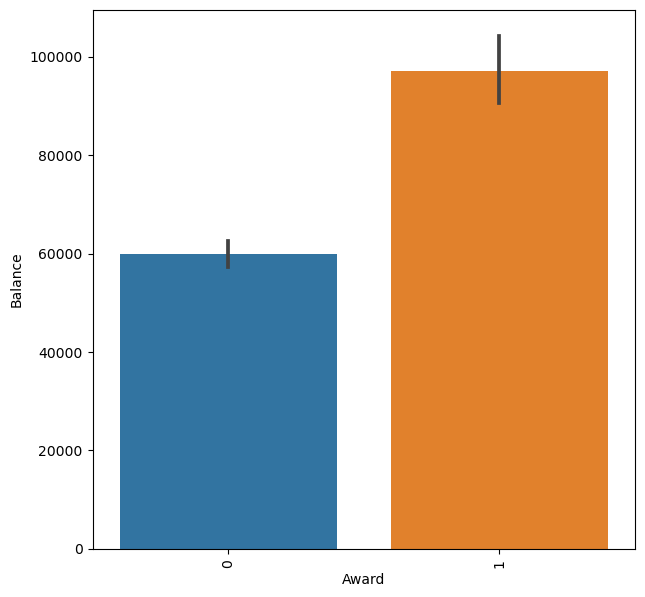

In [8]:
plt.figure(figsize=(7,7))
Balance = df2[['Award','Balance']].sort_values ('Balance',ascending = False)
ax =  sns.barplot(x = 'Award',y = 'Balance',data = Balance)
ax.set(xlabel = 'Award',ylabel = 'Balance')
plt.xticks(rotation = 90)
plt.show()

In [9]:
corr_matrix =  df2.corr()
corr_matrix["Balance"].sort_values(ascending = False)

Balance              1.000000
Bonus_miles          0.403487
cc1_miles            0.338344
Bonus_trans          0.324935
Days_since_enroll    0.263129
Flight_trans_12      0.255700
Flight_miles_12mo    0.217551
Award                0.178494
Qual_miles           0.108722
cc3_miles            0.035243
cc2_miles           -0.008804
ID#                 -0.243737
Name: Balance, dtype: float64

<AxesSubplot:>

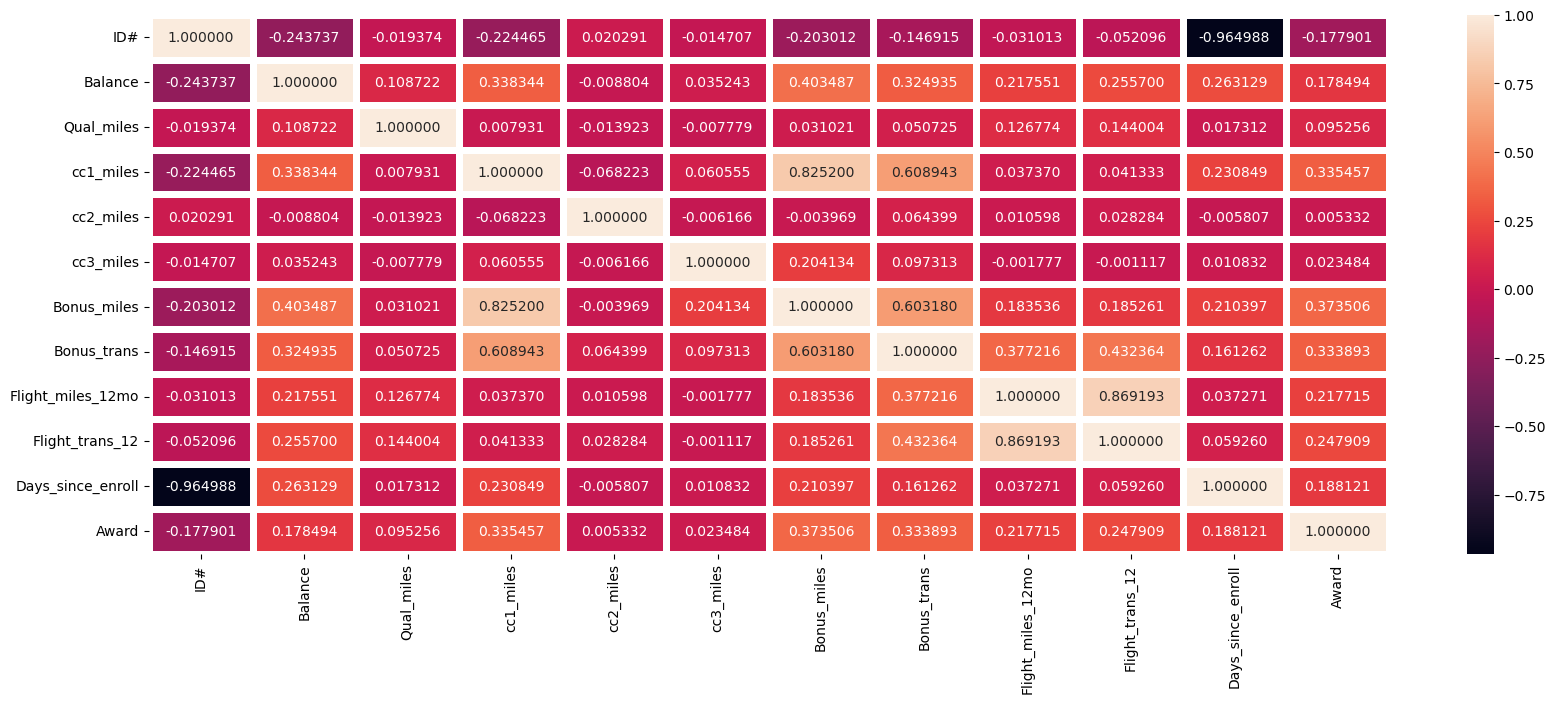

In [10]:
f,ax = plt.subplots(figsize = (20,7))
sns.heatmap(df2.corr(),annot = True, linewidths =5 ,fmt ='1f',ax = ax)

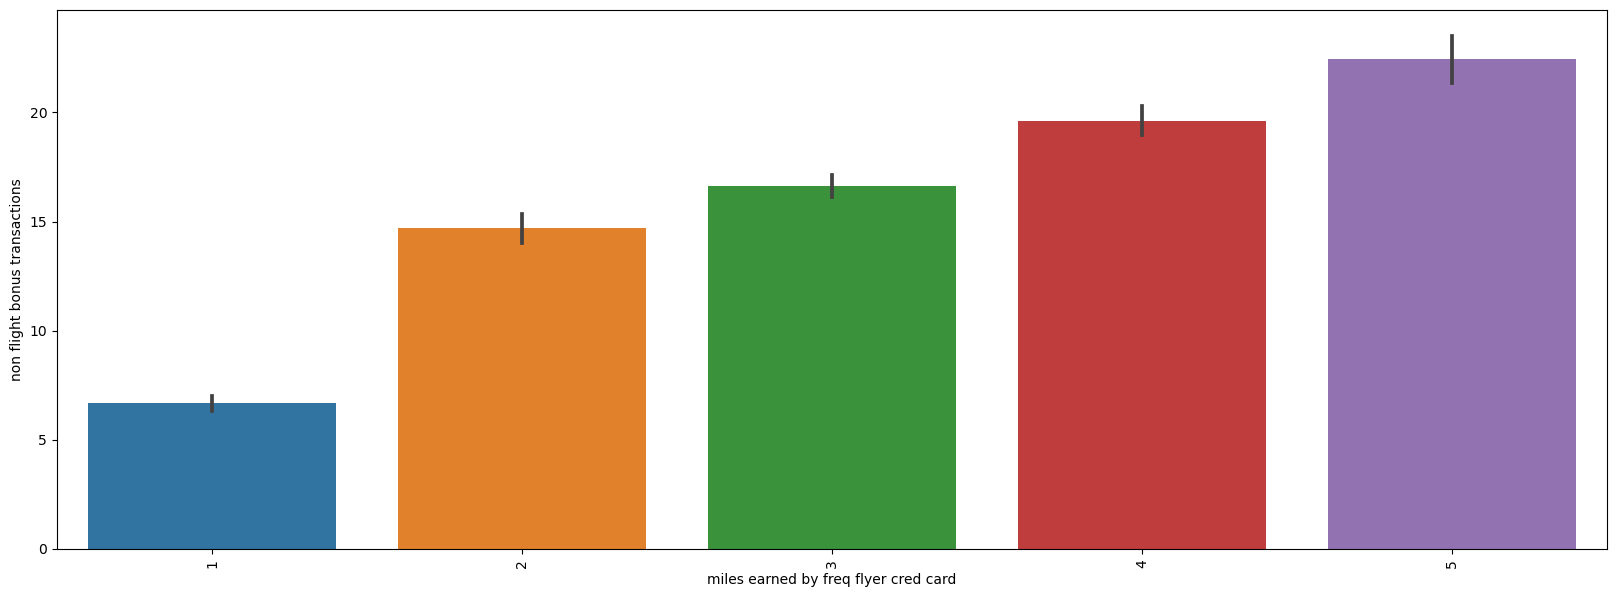

In [11]:
plt.figure(figsize=(20,7))
sorted_data = df2[['cc1_miles','Bonus_trans']].sort_values ('Bonus_trans',ascending = False)
ax =  sns.barplot(x = 'cc1_miles',y = 'Bonus_trans',data = sorted_data)
ax.set(xlabel = 'miles earned by freq flyer cred card',ylabel = 'non flight bonus transactions')
plt.xticks(rotation = 90)
plt.show()

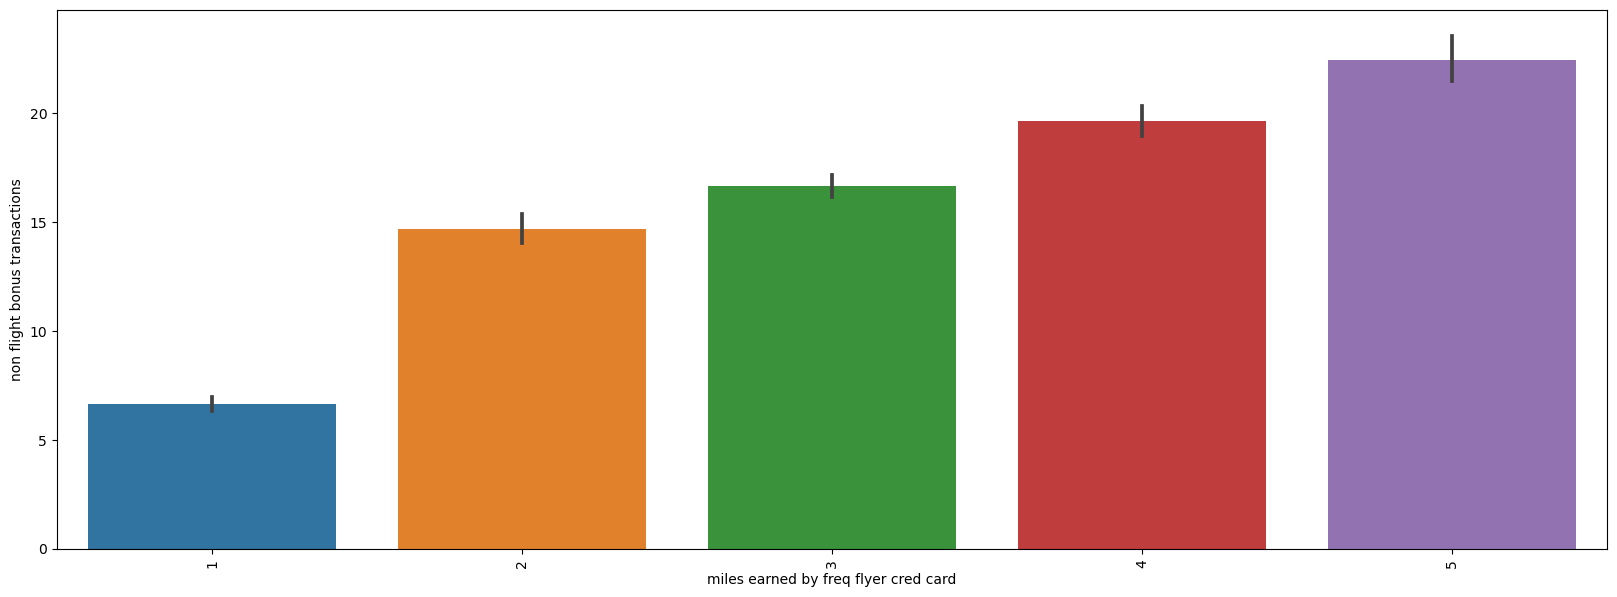

In [12]:
plt.figure(figsize=(20,7))
sorted_data = df2[['cc1_miles','Bonus_trans']].sort_values ('Bonus_trans',ascending = False)
ax =  sns.barplot(x = 'cc1_miles',y = 'Bonus_trans',data = sorted_data)
ax.set(xlabel = 'miles earned by freq flyer cred card',ylabel = 'non flight bonus transactions')
plt.xticks(rotation = 90)
plt.show()

ID#


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


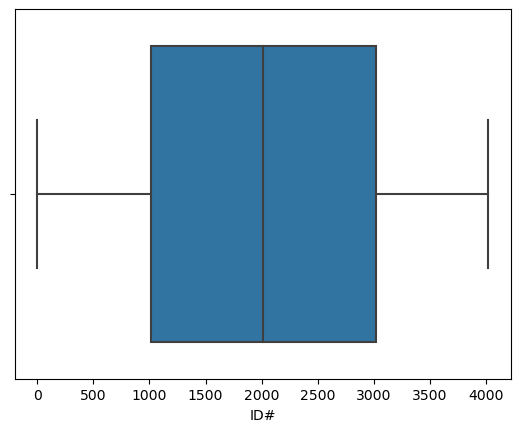

Balance


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


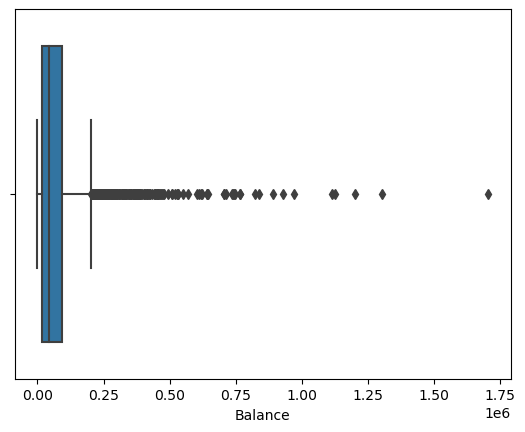

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Qual_miles


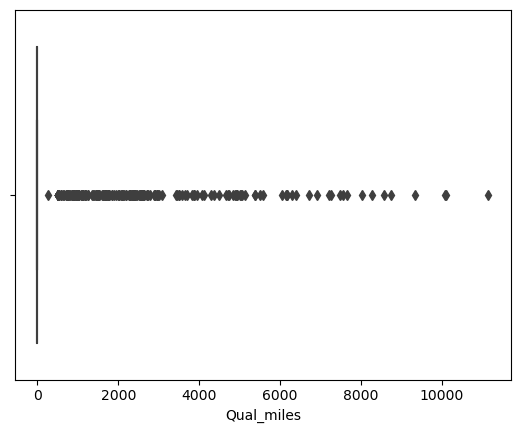

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


cc1_miles


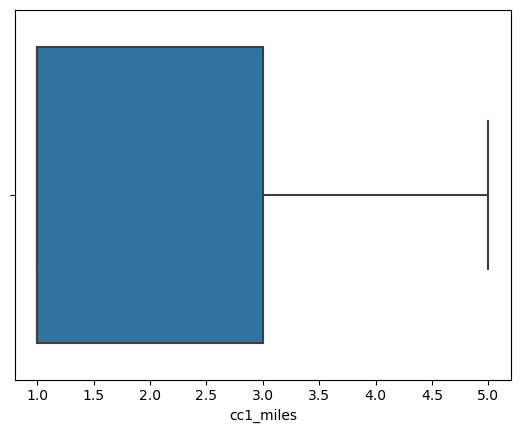

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


cc2_miles


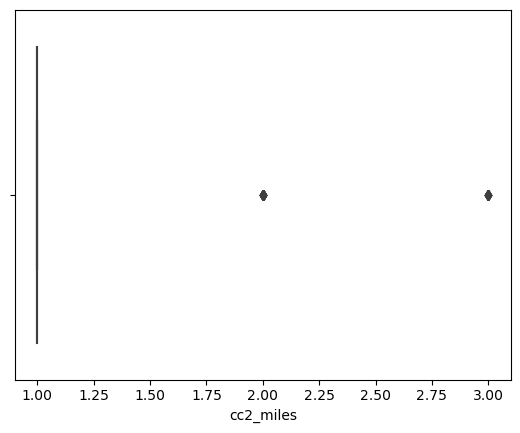

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


cc3_miles


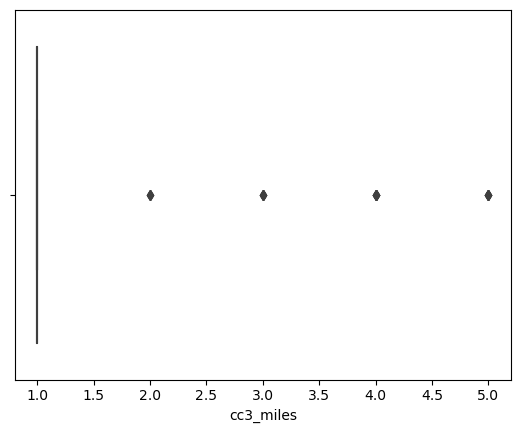

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Bonus_miles


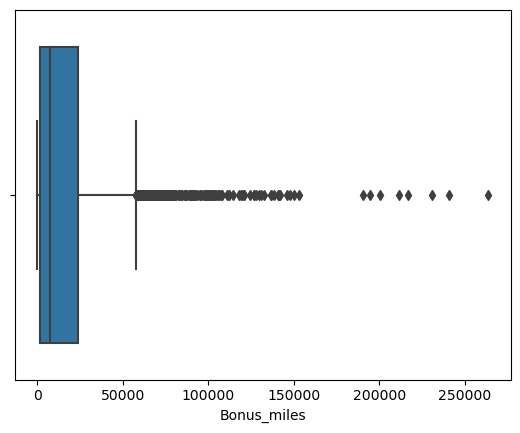

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Bonus_trans


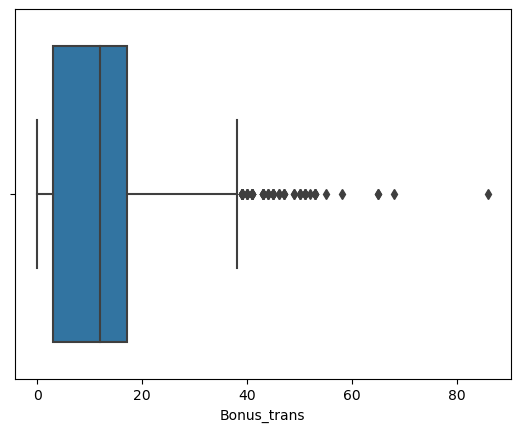

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Flight_miles_12mo


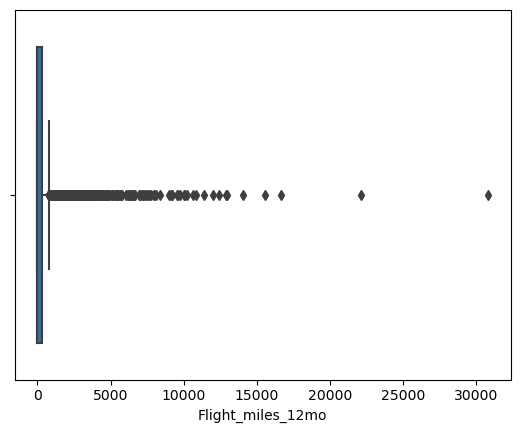

Flight_trans_12


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


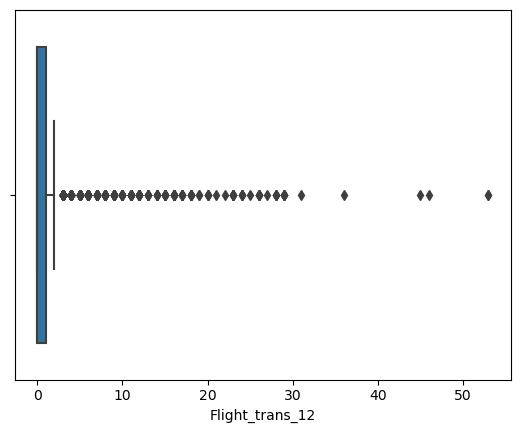

Days_since_enroll


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


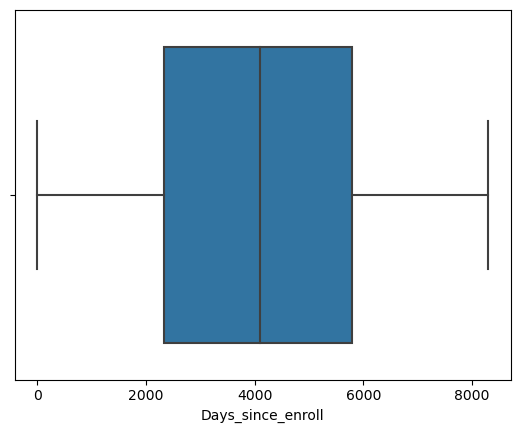

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Award


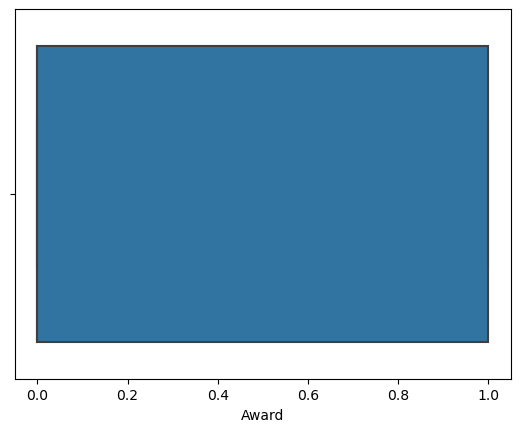

In [13]:
for n in df2.columns:
    print(n)
    sns.boxplot(df2[n])
    plt.show()

<AxesSubplot:>

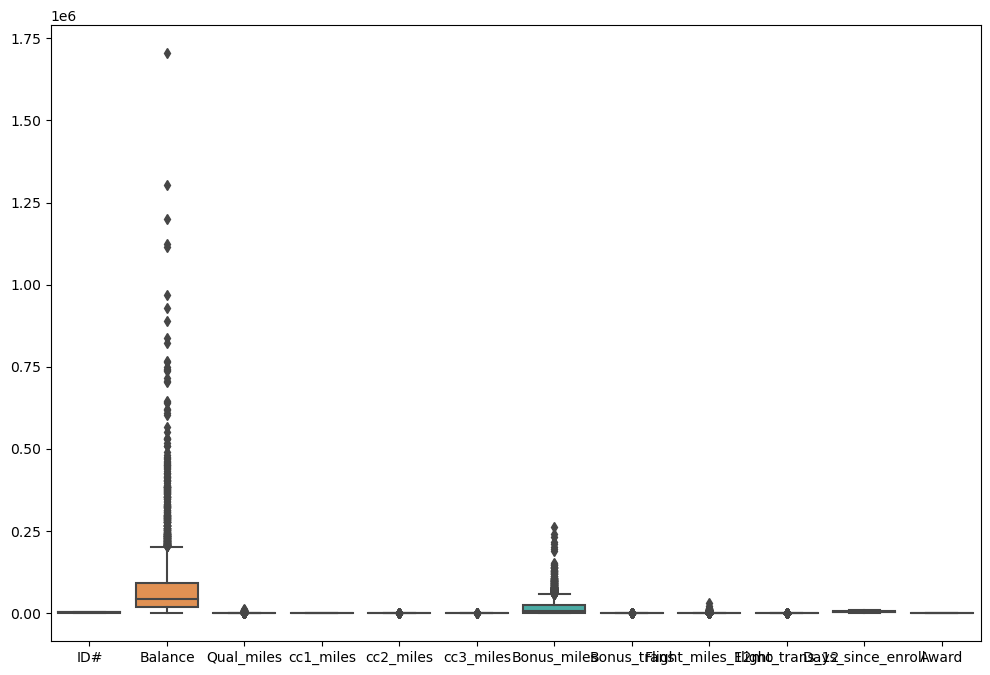

In [14]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df2)

In [15]:
q1 = df2['Balance'].quantile(0.25)
q3 = df2['Balance'].quantile(0.75)
iqr = q3-q1
uq1 = q3 + (1.5*iqr)
lq1 = q1 -(1.5*iqr)
df3 = df2[(df2['Balance']>lq1)&(df2['Balance']<uq1)]

df3.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


<AxesSubplot:>

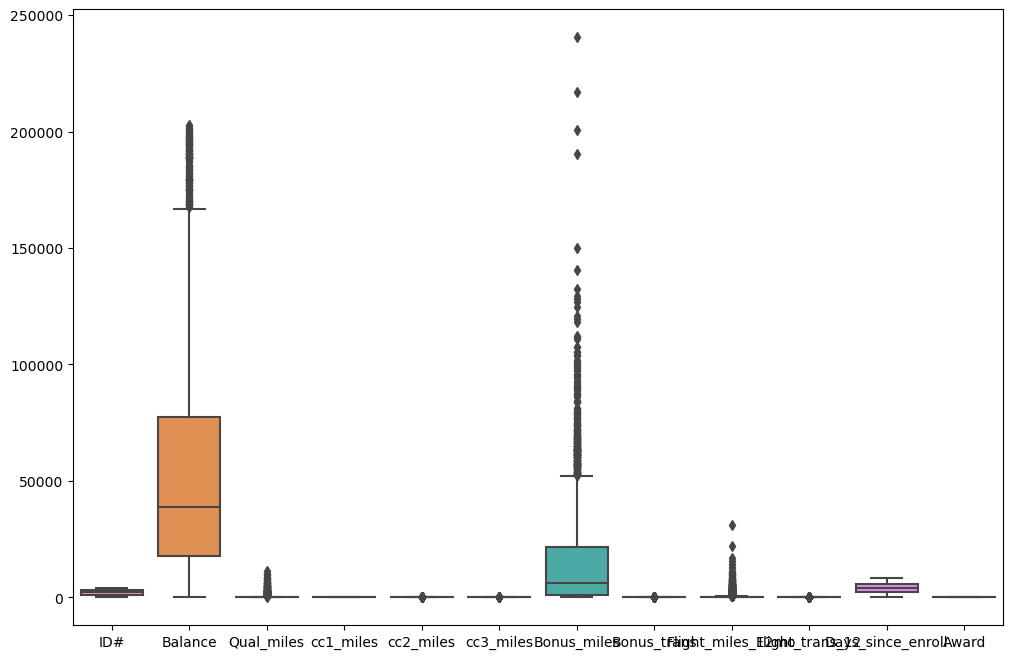

In [16]:
plt.figure(figsize=(12,8))
sns.boxplot(data= df3)

In [17]:
q1 = df3['Bonus_miles'].quantile(0.25)
q3 = df3['Bonus_miles'].quantile(0.75)
iqr = q3-q1
uq1 = q3 + (1.5*iqr)
lq1 = q1 -(1.5*iqr)
df4 = df3[(df3['Bonus_miles']>lq1)&(df3['Bonus_miles']<uq1)]
df4.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


<AxesSubplot:>

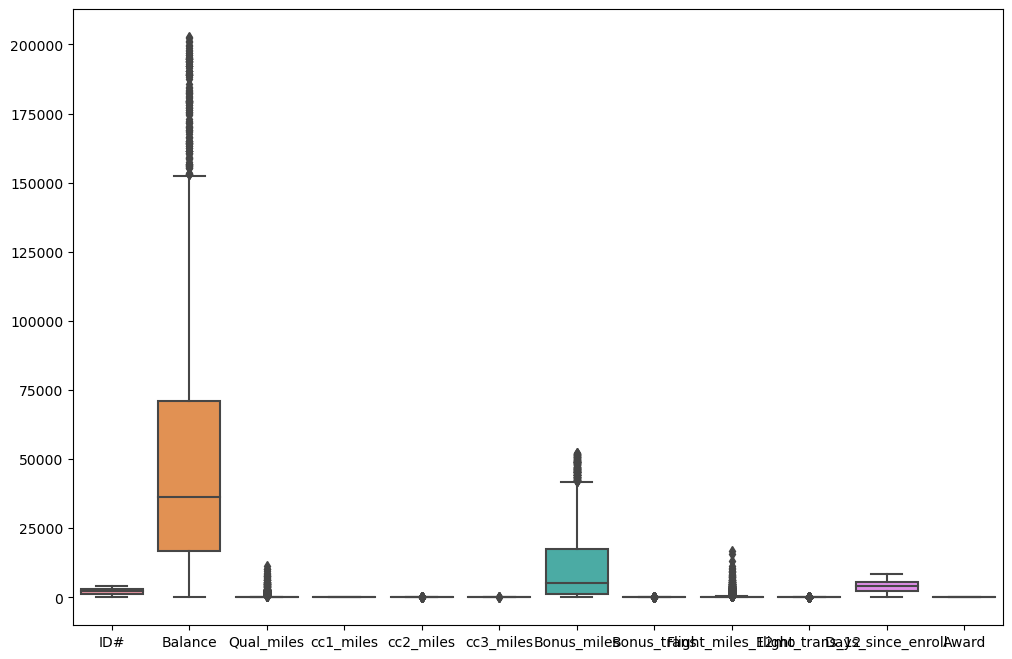

In [18]:
plt.figure(figsize=(12,8))
sns.boxplot(data= df4)

In [19]:
q1 = df4['Flight_miles_12mo'].quantile(0.25)
q3 = df4['Flight_miles_12mo'].quantile(0.75)
iqr = q3-q1
uq1 = q3 + (1.5*iqr)
lq1 = q1 -(1.5*iqr)
df5 = df4[(df4['Flight_miles_12mo']>lq1)&(df4['Flight_miles_12mo']<uq1)]

df5.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
5,6,16420,0,1,1,1,0,0,0,0,6942,0


<AxesSubplot:>

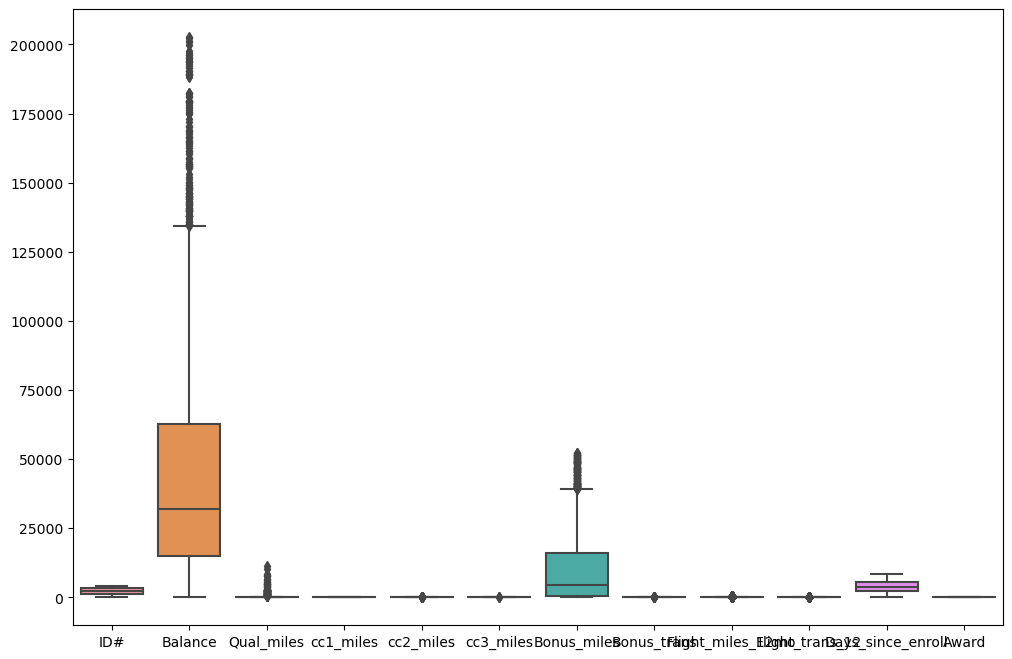

In [20]:
plt.figure(figsize=(12,8))
sns.boxplot(data= df5)

In [21]:
#removing outlier from Qual miles 
#as we can see outliers in Qual miles , eliminating outliers 
q1 = df5['Qual_miles'].quantile(0.25)
q3 = df5['Qual_miles'].quantile(0.75)
iqr = q3-q1
uq1 = q3 + (1.5*iqr)
lq1 = q1 -(1.5*iqr)
df6 = df5[(df5['Qual_miles']>lq1)&(df5['Qual_miles']<uq1)]
df6.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award


<AxesSubplot:>

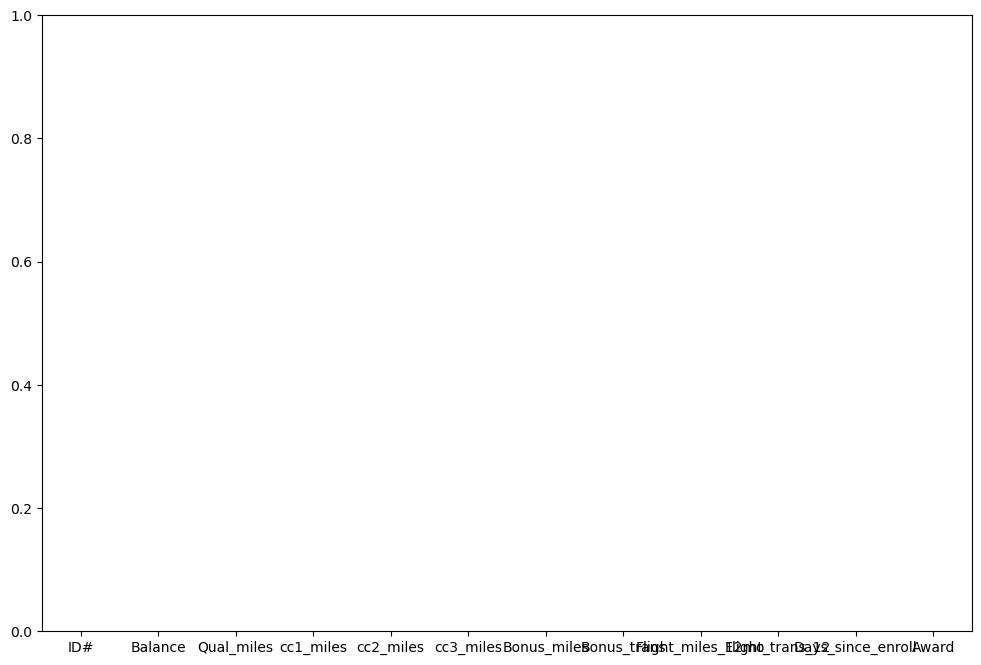

In [22]:
plt.figure(figsize=(12,8))
sns.boxplot(data= df6)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Qual_miles'>

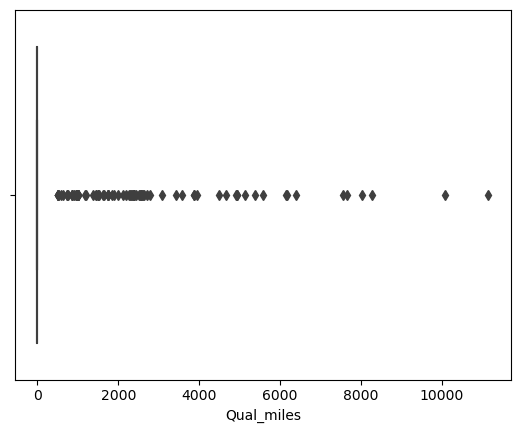

In [23]:
sns.boxplot(df5['Qual_miles'])

In [24]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [25]:
df7 = df5.drop(['ID#'],axis = 1)
df7

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
5,16420,0,1,1,1,0,0,0,0,6942,0
...,...,...,...,...,...,...,...,...,...,...,...
3993,3974,0,1,1,1,365,3,0,0,1397,0
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1


<AxesSubplot:>

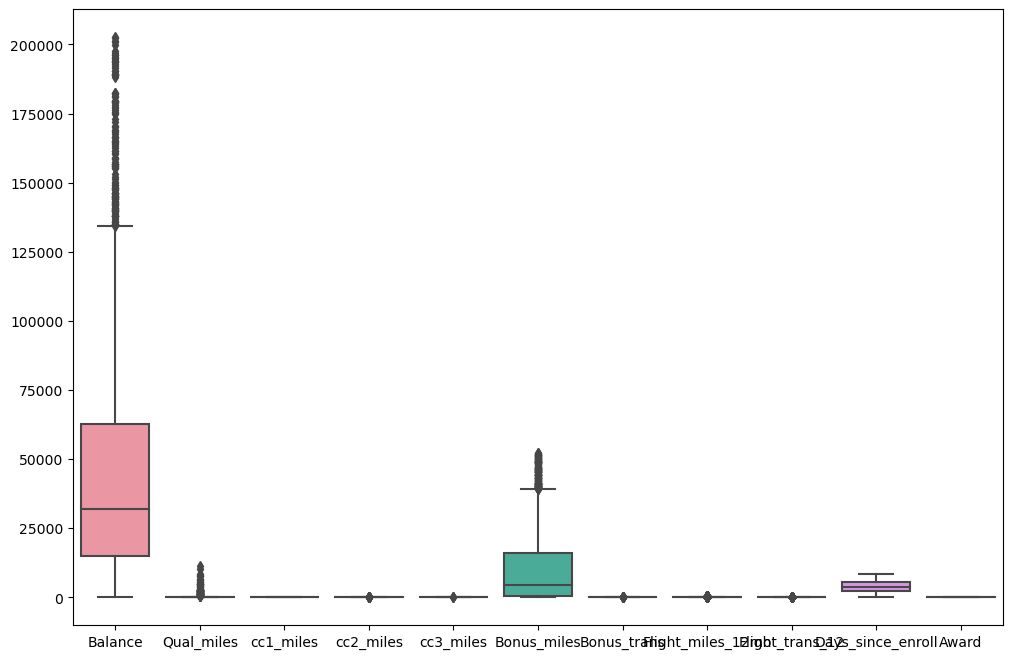

In [26]:
plt.figure(figsize=(12,8))
sns.boxplot(data= df7)

<AxesSubplot:>

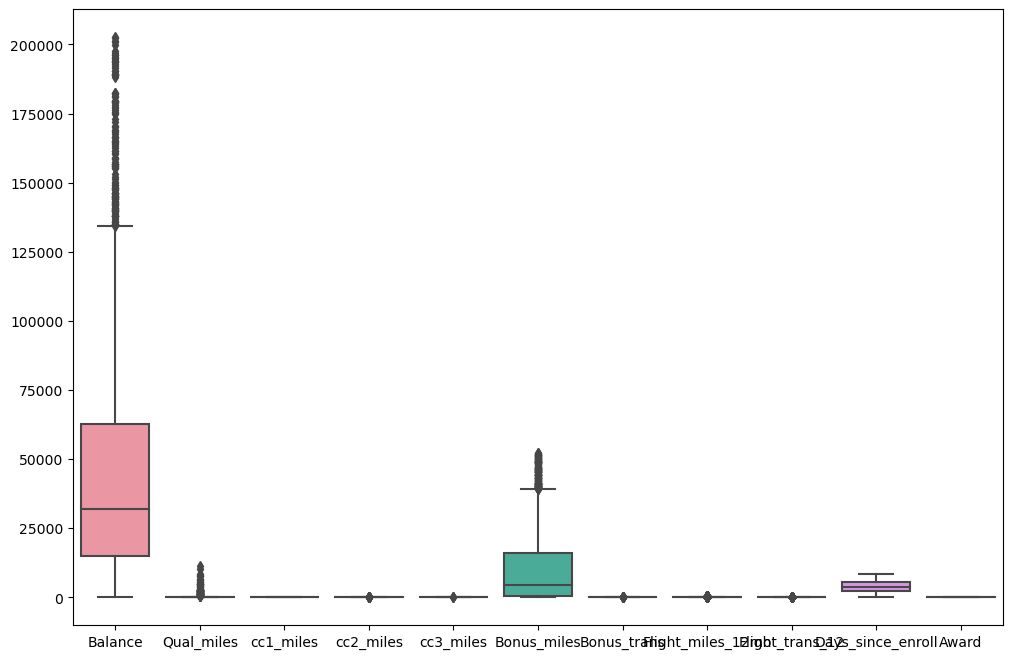

In [27]:
plt.figure(figsize=(12,8))
sns.boxplot(data= df7)

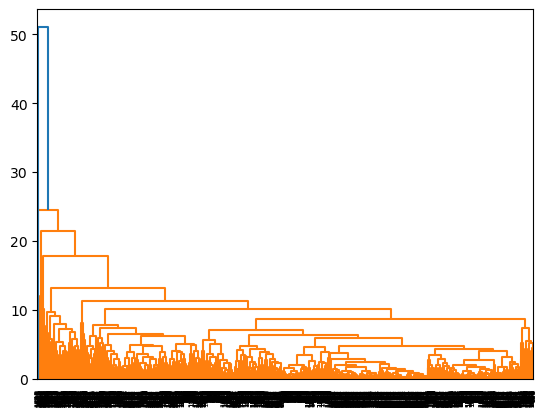

In [51]:
#Hierarchial Clustering
dng = sch.dendrogram(sch.linkage(dataset_norm,method = 'complete'))


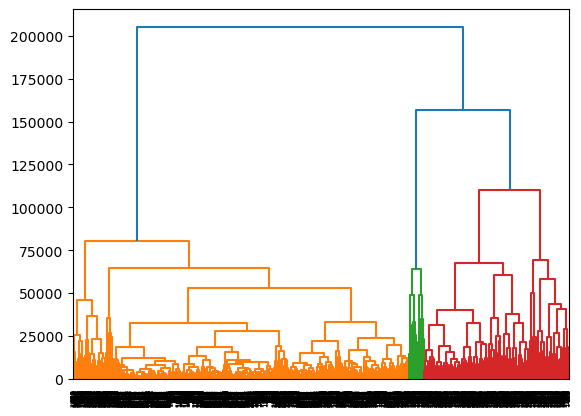

In [52]:
dng = sch.dendrogram(sch.linkage(df7,method = 'complete'))


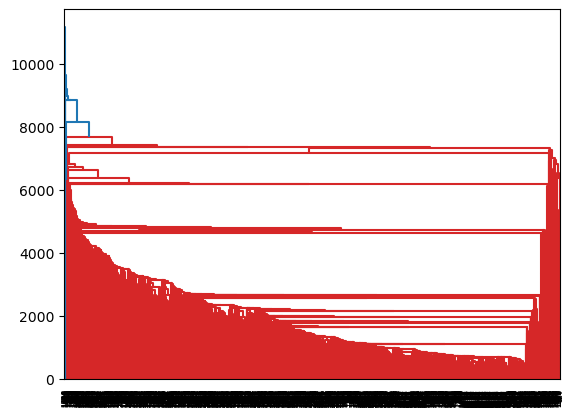

In [31]:
dng = sch.dendrogram(sch.linkage(df7, method = 'single'))

In [32]:
hc=AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage = 'complete')

In [38]:
hc.fit(df7)
y_hc = hc.fit_predict(df7)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
Clusters.head()

,Clusters
0,1
1,1
2,1
3,1
4,1


In [39]:
y_hc

array([1, 1, 1, ..., 0, 0, 1], dtype=int64)

In [40]:
df7['h_clusterid'] = y_hc
df7.head

<bound method NDFrame.head of       Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0       28143           0          1          1          1          174   
1       19244           0          1          1          1          215   
2       41354           0          1          1          1         4123   
3       14776           0          1          1          1          500   
5       16420           0          1          1          1            0   
...       ...         ...        ...        ...        ...          ...   
3993     3974           0          1          1          1          365   
3994    18476           0          1          1          1         8525   
3995    64385           0          1          1          1          981   
3996    73597           0          3          1          1        25447   
3998     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enr

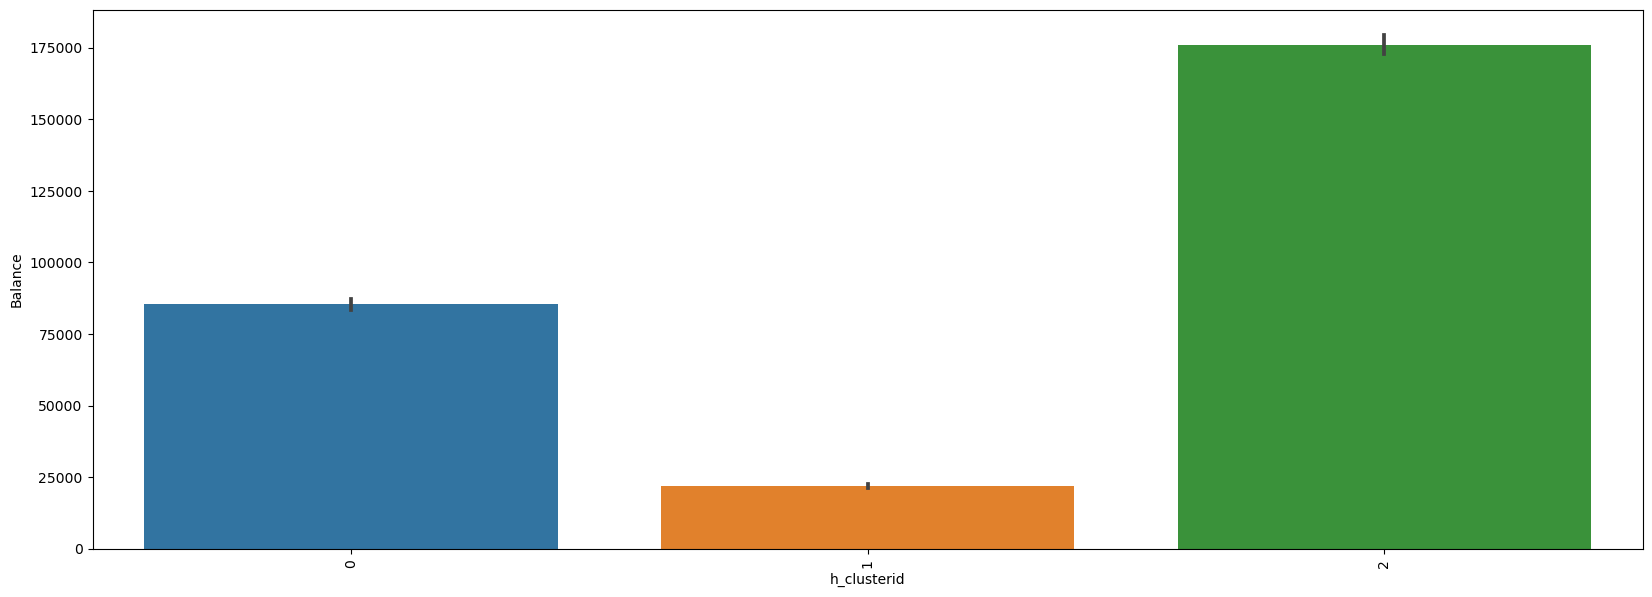

In [41]:
#plotting with no of miles eligible for free flight and agglomerative clusterid 
plt.figure(figsize=(20,7))
Balance = df7[['h_clusterid','Balance']].sort_values ('Balance',ascending = False)
ax =  sns.barplot(x = 'h_clusterid',y = 'Balance',data = Balance)
ax.set(xlabel = 'h_clusterid',ylabel = 'Balance')
plt.xticks(rotation = 90)
plt.show()

In [42]:
standard_scaler = StandardScaler()
dataset_norm = standard_scaler.fit_transform(df7)
dataset_norm.shape

(2763, 12)

In [43]:
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
# Generating the sample data from make_blobs

X, Y = make_blobs()

no_of_clusters = [2, 3, 4, 5, 6]

for n_clusters in no_of_clusters:

    cluster = KMeans(n_clusters = n_clusters)
    cluster_labels = cluster.fit_predict(X)

    # The silhouette_score gives the
    # average value for all the samples.
    silhouette_avg = silhouette_score(X, cluster_labels)

    print("For no of clusters =", n_clusters,
           " The average silhouette_score is :", silhouette_avg)

For no of clusters = 2  The average silhouette_score is : 0.6108690334042728
For no of clusters = 3  The average silhouette_score is : 0.6544826590852212
For no of clusters = 4  The average silhouette_score is : 0.5673961610331544
For no of clusters = 5  The average silhouette_score is : 0.4857833534359394
For no of clusters = 6  The average silhouette_score is : 0.4559297257593268


Text(0, 0.5, 'wcss')

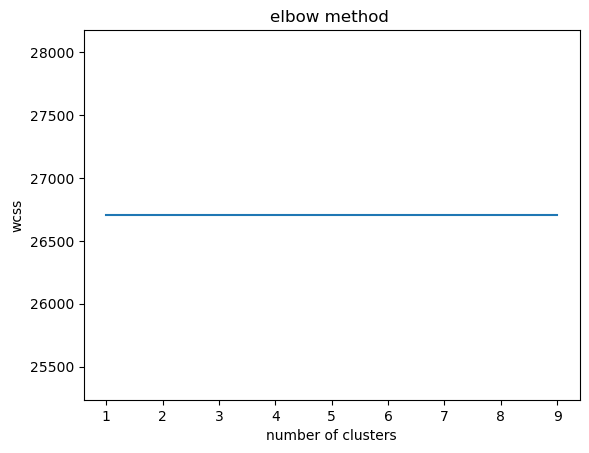

In [47]:
#kmeans
#elbow method for determining K value 
wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters = 2,random_state = 0)
    kmeans.fit(dataset_norm)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10),wcss)
plt.title('elbow method ')
plt.xlabel('number of clusters')
plt.ylabel('wcss')

In [130]:
#since we are looking for a generalized model for clustering we go with K value 4
clusters_new = KMeans(4, random_state= 100)
clusters_new.fit(dataset_norm)

KMeans(n_clusters=4, random_state=100)

In [131]:
clusters_new.labels_

array([1, 1, 1, ..., 1, 0, 1])

In [132]:
#assigning cluster labels to our dataset 
df7['clusterid_new'] = clusters_new.labels_
df7.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,h_clusterid,clusterid_new
0,28143,0,1,1,1,174,1,0,0,7000,0,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,0,1
5,16420,0,1,1,1,0,0,0,0,6942,0,0,1


In [133]:
clusters_new.cluster_centers_

array([[ 0.67028806, -0.031608  ,  1.18314075, -0.07606204,  0.06139451,
         1.06911111,  0.86263921, -0.2600376 , -0.23012272,  0.29955815,
         0.45819581, -0.03756284],
       [-0.40155029, -0.0510379 , -0.63799245,  0.02999994, -0.02869207,
        -0.58387343, -0.48306662, -0.27819512, -0.2661428 , -0.16918962,
        -0.29562756, -0.0495239 ],
       [ 0.41213388, 14.22695579,  0.36432401, -0.09874846, -0.02869207,
         0.20212636,  0.36537536, -0.16154316,  0.08795431,  0.31618866,
         0.8922952 , 21.00194286],
       [ 0.32214293,  0.12049322,  0.05331711,  0.0803013 , -0.02869207,
         0.10626063,  0.16895709,  3.09388826,  2.87973302,  0.06426604,
         0.36054668, -0.0495239 ]])

In [135]:
df7.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,h_clusterid
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,72816.911364,63.931818,3.065909,1.003409,1.005682,23640.867045,16.107955,1.875000,0.027273,4520.995455,0.473864,0.001136
1,1,28373.626360,52.044135,1.065901,1.019347,1.000000,2729.640266,5.441959,0.684401,0.011487,3557.845224,0.139057,0.000000
2,2,62112.666667,8787.666667,2.166667,1.000000,1.000000,12673.000000,12.166667,8.333333,0.166667,4555.166667,0.666667,2.000000
3,3,58381.233184,156.991031,1.825112,1.026906,1.000000,11460.242152,10.609865,221.793722,1.390135,4037.533632,0.430493,0.000000


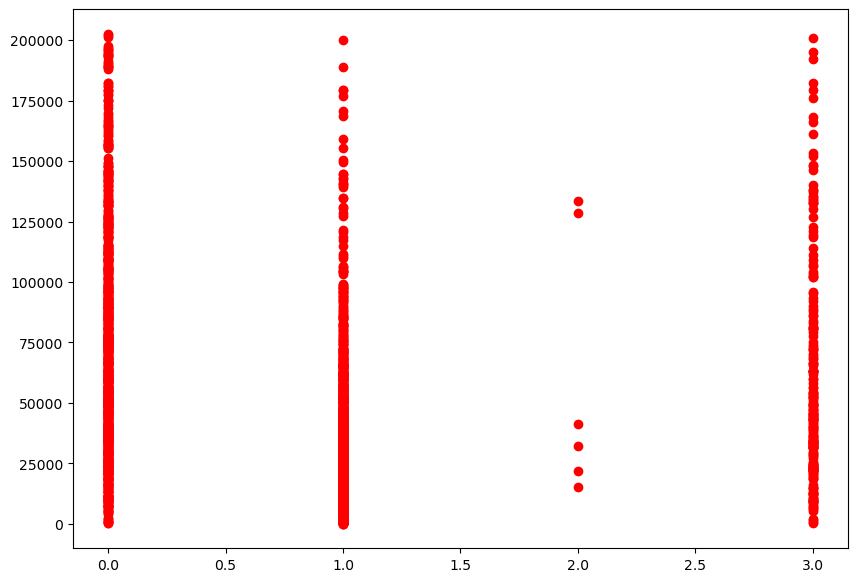

In [137]:
#plotting clusters 
plt.figure(figsize=(10,7))
plt.scatter(df7['clusterid_new'],df7['Balance'],c = 'red')

In [139]:
df7[df7['clusterid_new']==1]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,h_clusterid,clusterid_new
0,28143,0,1,1,1,174,1,0,0,7000,0,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,0,1
5,16420,0,1,1,1,0,0,0,0,6942,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3990,11310,0,1,1,1,5021,2,0,0,1409,0,0,1
3992,11181,0,1,1,1,929,12,0,0,1407,0,0,1
3993,3974,0,1,1,1,365,3,0,0,1397,0,0,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,0,1


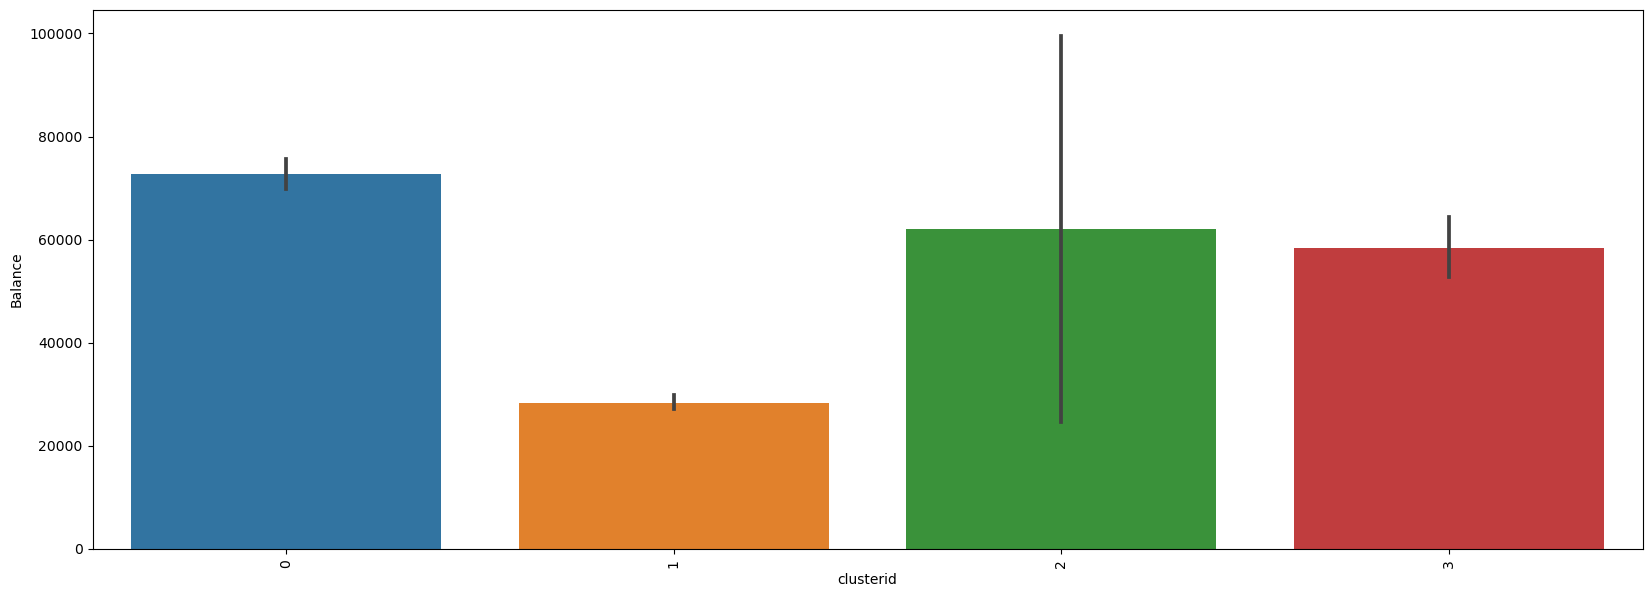

In [141]:
plt.figure(figsize=(20,7))
Balance = df7[['clusterid_new','Balance']].sort_values ('Balance',ascending = False)
ax =  sns.barplot(x = 'clusterid_new',y = 'Balance',data = Balance)
ax.set(xlabel = 'clusterid',ylabel = 'Balance')
plt.xticks(rotation = 90)
plt.show()

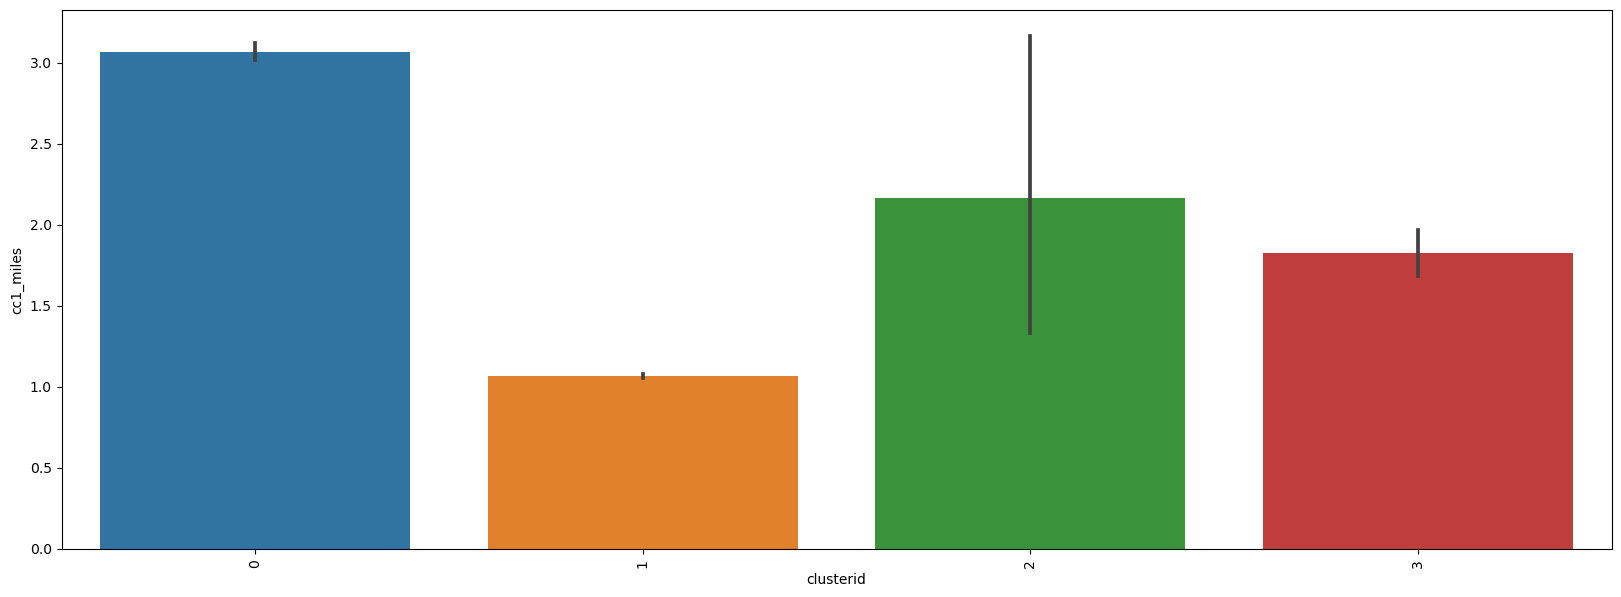

In [142]:
#plotting with frequent flyer with flyer cred card and clusterid 
plt.figure(figsize=(20,7))
Balance = df7[['clusterid_new','cc1_miles']].sort_values ('cc1_miles',ascending = False)
ax =  sns.barplot(x = 'clusterid_new',y = 'cc1_miles',data = Balance)
ax.set(xlabel = 'clusterid',ylabel = 'cc1_miles')
plt.xticks(rotation = 90)
plt.show()

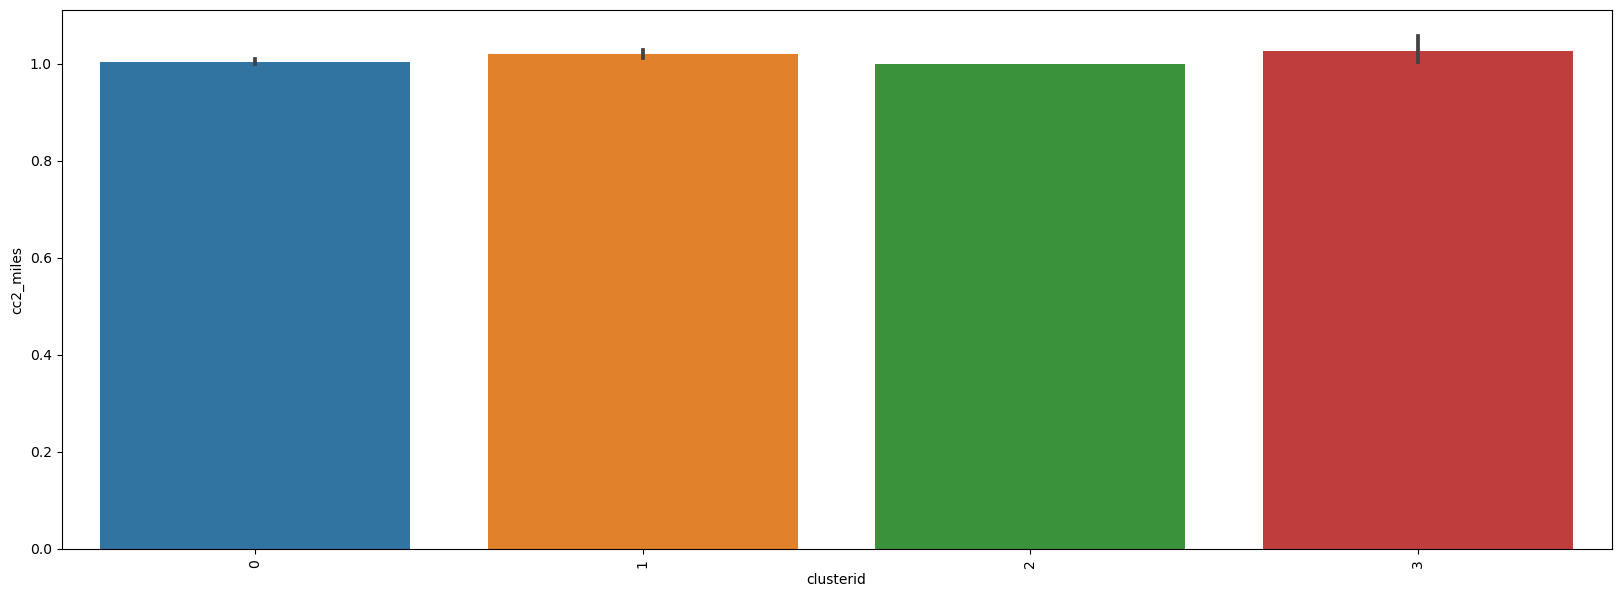

In [143]:
#plotting with frequent flyer with rewards earned by cred card and clusterid 
plt.figure(figsize=(20,7))
Balance = df7[['clusterid_new','cc2_miles']].sort_values ('cc2_miles',ascending = False)
ax =  sns.barplot(x = 'clusterid_new',y = 'cc2_miles',data = Balance)
ax.set(xlabel = 'clusterid',ylabel = 'cc2_miles')
plt.xticks(rotation = 90)
plt.show()

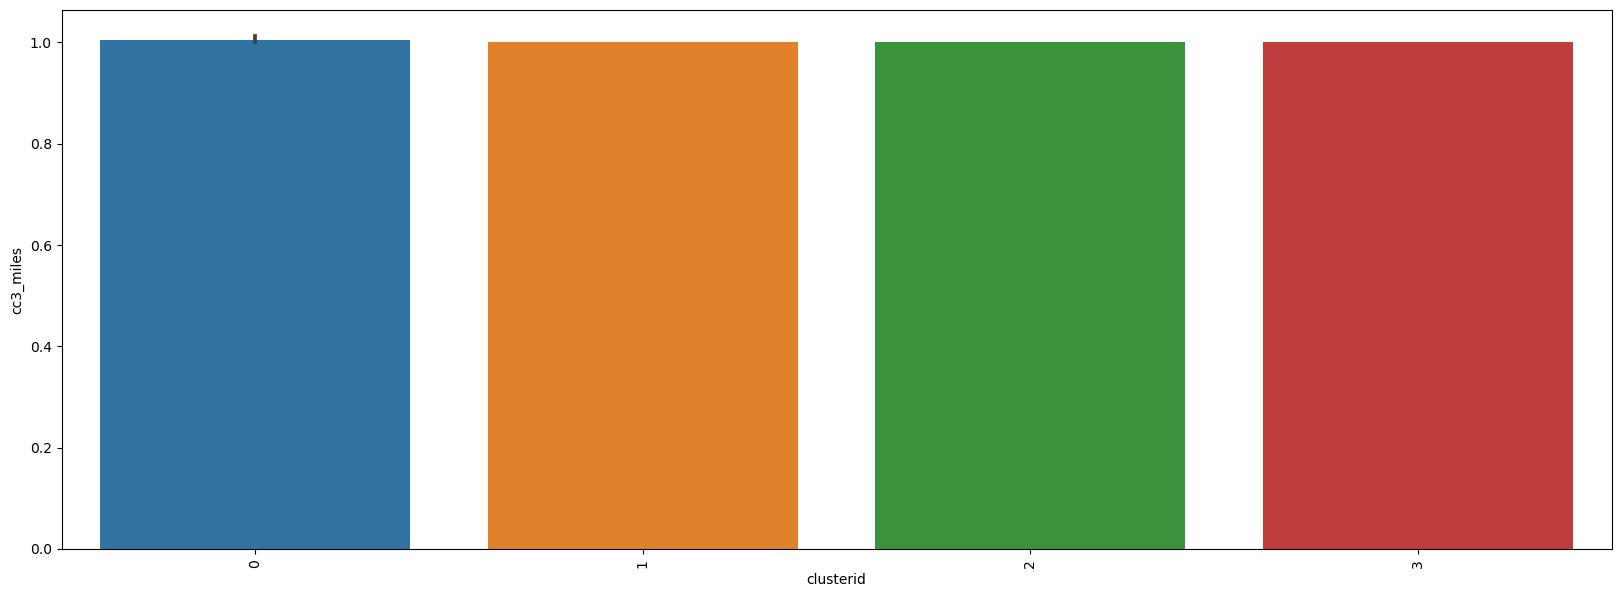

In [144]:
#plotting with  rewards earned by small buisness cred card and clusterid 
plt.figure(figsize=(20,7))
Balance = df7[['clusterid_new','cc3_miles']].sort_values ('cc3_miles',ascending = False)
ax =  sns.barplot(x = 'clusterid_new',y = 'cc3_miles',data = Balance)
ax.set(xlabel = 'clusterid',ylabel = 'cc3_miles')
plt.xticks(rotation = 90)
plt.show()


In [145]:
#DBSCANS
df8 = df7.drop(['clusterid_new','h_clusterid'],axis = 1)

In [147]:
stsscaler = StandardScaler()
X = stsscaler.fit_transform(dataset_norm)

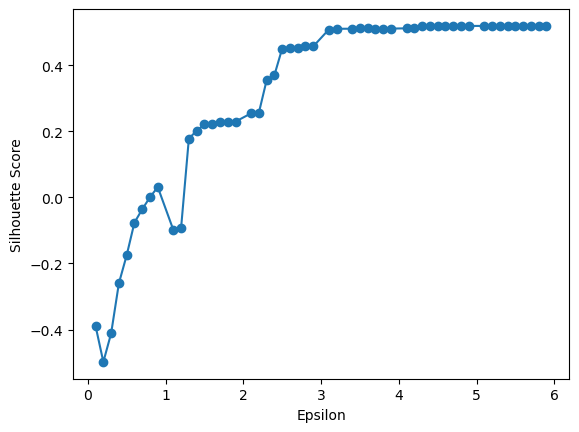

In [150]:
from sklearn.metrics import silhouette_score

eps_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.1,2.2,2.3,2.4,2.5,2.6
             ,2.7,2.8,2.9,3.1,3.2,3.4,3.5,3.6,3.7,3.8,3.9,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5.1,5.2
             ,5.3,5.4,5.5,5.6,5.7,5.8,5.9]
scores = []
for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=2)
    dbscan.fit(X)
    labels = dbscan.labels_
    score = silhouette_score(X, labels)
    scores.append(score)

plt.plot(eps_values, scores, marker='o')
plt.xlabel('Epsilon')
plt.ylabel('Silhouette Score')
plt.show()

In [152]:
dbscan = DBSCAN(eps = 6, min_samples=22)
dbscan.fit_predict(X)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [153]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [154]:
cl = pd.DataFrame(dbscan.labels_,columns = ['clusterid'])
cl

,clusterid
0,0
1,0
2,0
3,0
4,0
...,...
2758,0
2759,0
2760,0
2761,0


In [155]:
df8['cl'] = dbscan.labels_
df8

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,cl
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
5,16420,0,1,1,1,0,0,0,0,6942,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3993,3974,0,1,1,1,365,3,0,0,1397,0,0
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0


In [157]:
# total number of noisy samples 
df8[df8['cl']== -1]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,cl
198,8669,0,1,3,1,11397,16,0,0,7486,1,-1
226,117329,0,1,2,1,6448,11,0,0,7416,1,-1
343,112501,0,1,1,2,19140,11,0,0,7101,0,-1
381,167670,0,1,3,1,15907,13,0,0,6994,0,-1
392,11189,0,1,2,1,9044,20,0,0,8296,1,-1
589,133445,8264,1,1,1,3375,13,0,0,6492,1,-1
794,55610,0,1,2,1,5095,13,0,0,6151,0,-1
1149,84856,0,1,2,1,6894,13,0,0,5547,0,-1
1177,32214,11148,3,1,1,12717,10,0,0,5576,1,-1
1270,16103,0,1,3,1,10819,13,0,0,5427,0,-1


In [158]:
df8.groupby('cl').agg(['mean']).reset_index()

,cl,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,-1,47712.897436,1351.948718,1.256410,2.051282,1.128205,13143.076923,13.487179,20.512821,0.153846,4047.948718,0.282051
1,0,44985.223201,65.106461,1.773862,1.000000,1.000000,10072.643172,9.210352,18.903084,0.127753,3903.444567,0.270191


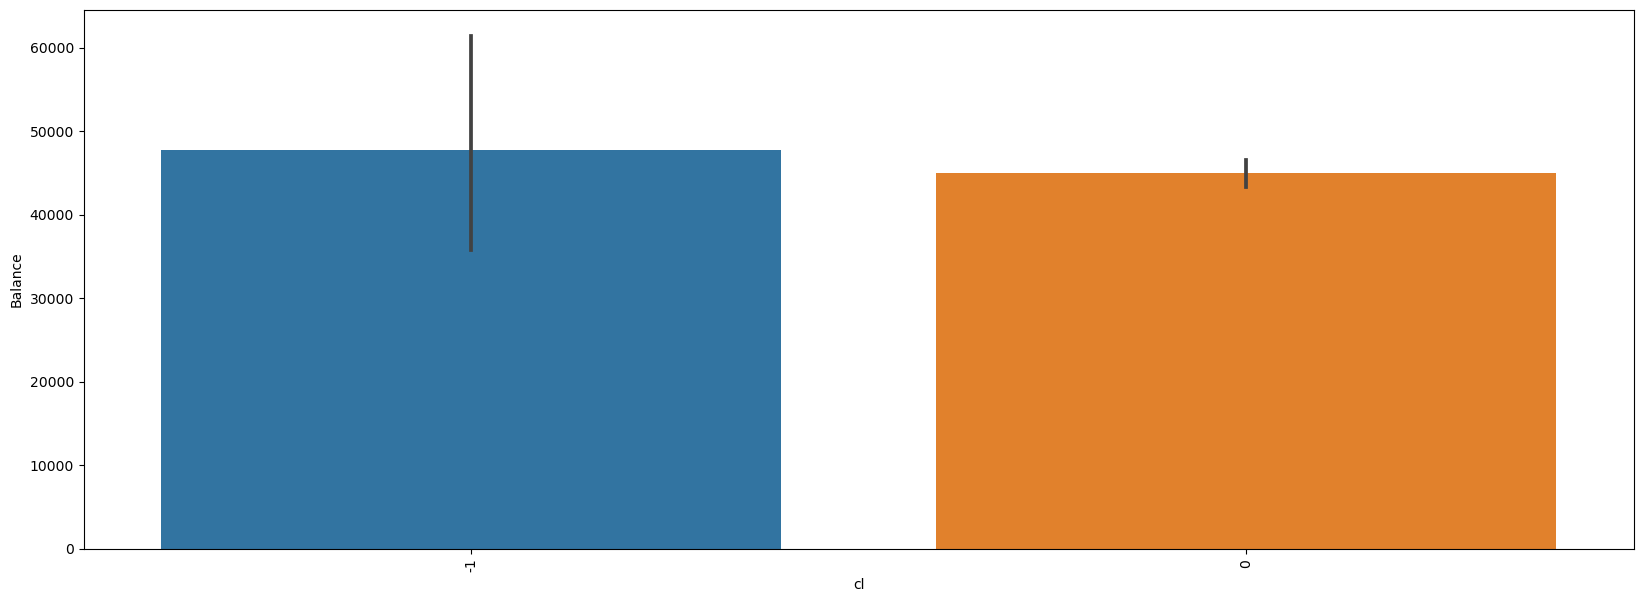

In [160]:
#plotting with frequent flyers and non frequent flyers
plt.figure(figsize=(20,7))
Balance = df8[['cl','Balance']].sort_values ('Balance',ascending = False)
ax =  sns.barplot(x = 'cl',y = 'Balance',data = Balance)
ax.set(xlabel = 'cl',ylabel = 'Balance')
plt.xticks(rotation = 90)
plt.show()

In [68]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])
cl

,cluster
0,0
1,0
2,0
3,0
4,-1
...,...
3994,0
3995,0
3996,0
3997,0
